# 딥러닝 메인 프로젝트: 뉴스 카테고리 다중분류
- 2025.12.09(Tue)
- 모두의 연구소 데싸6기
- Mihyn Lee

---
---

# ⭐️결과 요약 및 회고⭐️

## 1.개요
- 로이터 뉴스 데이터셋을 활용하여 텍스트 다중분류(46개 클래스) 성능 평가
- 단어장 크기(정보량)의 변화가 모델 성능에 미치는 영향 분석 (1만개, 0.5만개, 전체 데이터셋)
- 모델 성능 비교: 머신러닝 vs. 딥러닝
- 평가지표: Accuracy, F1-score

## 2.결과
- C2 & C3 합동 조 결과
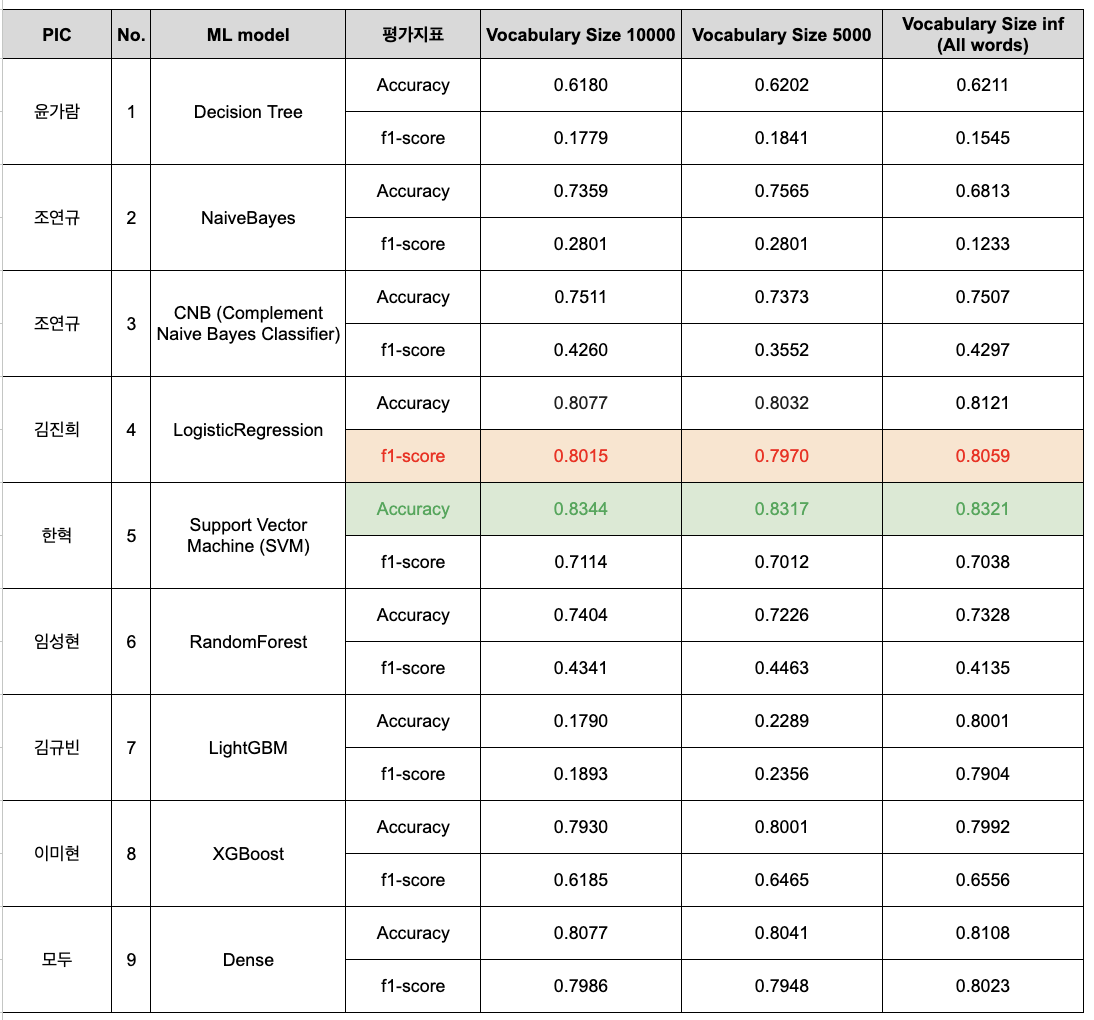


### 2-1.이미현 담당 머신러닝 모델: XGBoost / 딥러닝 모델(전원 공통): DNN

| Model/Metric | Vocab Size 10000 | Vocab Size 5000 | Vocab Size inf |
|--------------|------------------|------------------|----------------|
| XGBoost Accuracy | 0.7930 | 0.8001 | 0.7992 |
| XGBoost F1-score (Macro) | 0.6185 | 0.6465 | 0.6556 |
| Dense NN Accuracy | 0.8032 | 0.8068 | 0.7988 |
| Dense NN F1-score (Weighted) | 0.7925 | 0.7981 | 0.7906 |


- 단어장 크기 n=5000일 때, XGBoost 및 DNN 모두 가장 높은 accuracy 기록 (XGBoost 0.8001, DNN 0.8068) \
  -> 단어장 크기가 너무 크면 불필요한 노이즈나 특수한? 단어가 증가해서 일반화 성능이 떨어질 수도 있을 듯
- 단, F1-score 조화평균 측면에서는 XGBoost 머신러닝 모델은 0.6556으로 높았으나, 성능이 높은 점수는 아님 \
  시간 관계 상 파라미터 튜닝/스태킹 앙상블 등을 진행하지 못했으나,\
  약 2.6만개의 전체 단어장으로 학습할 경우 소수 클래스 분류도 포함할 수 있어 성능 개선이 기대됨

[머신러닝 vs. 딥러닝]
- **전반적으로는 DNN이 XGBoost 보다 월등히 높은 F1-Score 성능 획득**
- 비선형함수 ReLU 사용으로 TF-IDF 벡터 내 복잡한 비선형 패턴과 특성 간의 상호작용 학습 성능이 머신러닝보다 높았을 것으로 예상
- DNN에서 Weighted average 사용 후, Accuracy와 F1-Score 간의 성능 차이가 거의 없었음
- 하지만 다른 팀원들 결과로 보았을 때, 다양한 머신러닝을 학습해보면서 Dense와의 비교가 반드시 필요하다고 보임
- 단어장 크기 = 데이터셋은 반드시 많아야 좋은 것은 아니고, 학습의 방점을 소수클래스(희귀/특별한 단어)에 둘 것인지, 빈도가 높은 주류클래스에 둘 것인지에 따라 선택해야 할 것으로 판단됨

## 3.모델 성능 검증 단계별 시도 사항 및 요약
A. 에러 점검
- Input 레이어 shap이 TF-IDF 행렬의 shape과 불일치하여 ValueError 발생 -> x_train_tfidf.shape[1]을 활용해 입력 차원 맞춰줌

B. 평가지표 추가하여 자체 검토
- Precision, Recall도 함께 확인하여 모델의 성능 점검
- 특히, 로이터 뉴스 데이터는 클래스(46개) 불균형 문제가 있다고 하여, 초반 average_type을 macro(단순평균)로 했으나, weighted average와의 gap 확인을 통해 최종적으로 F1-score는 weighted average로 출력
- 클래스 불균형에 따른 가중치 적용이 working 하며, 주류 클래스 대변력이 높아져, F1-score 성능도 좋아짐

C. 아쉬운 점
- XGBoost를 담당하게 되어, DNN이 끝나면, 소프트보팅도 해보고 결과를 비교해보고 싶었는데, 코랩과 주피터를 함께 돌리면 더 느려져서 시간 내 수행하지 못해 아쉬움ㅠ

---
---

#오늘 할일
### 실험 또 실험 🤯


1. 단어장 개수를 바꾸면서(10000, 5000, Nan) 8개의 ML모델을 사용해보고  accuacry와 f1-score를 비교
(표로 나타내보세요~) (벡터화는 tf-idf로 통일)

2. 딥러닝과 머신런닝의 차이 비교하기
- 딥러닝 모델 1개 Dense를 이용해서 비교해보세요 평가지표 = accuacry, f1-score

In [1]:
from tensorflow.keras.datasets import reuters
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Step 1. 데이터 준비
- index -> text
- DTM , TF-idf 학습데이터 준비

In [2]:
# num_words를 바꿔서 단어장 데이터셋 준비

# 단어장의 크기 제한
# 전체 학습 데이터에서 빈도수가 가장 높은 n개의 단어만 사용하고,
# 나머지 단어는 <unk> 토큰으로 처리

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [3]:
# 단어 인덱스 복원 (정수 -> 텍스트)
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [4]:
# 로이터 뉴스 데이터 0,1,2는 특별 토큰이었음
# index_to_word: 기존 단어 인덱스에 3 더해서 실제 단어 맵핑하는 딕셔너리 만들기

index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [5]:
# 디코딩 (복원)
# 정수 리스트로 되어 있던 x_train 데이터를 맵핑 딕셔너리를 이용해 공백으로 구분된 단어 문장으로 변환

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [6]:
# x_test도 동일한 디코딩 과정 진행

decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)

x_test = decoded_test
print(len(x_test))

2246


In [7]:
# 벡터화 DTM, TF-idf 행렬 생성
# 텍스트 형태의 데이터를 머신러닝이 이해할 수 있는 숫자 벡터로 변환

# Document-Term Matrix, 문서-단어 행렬 생성 도구
dtmvector = CountVectorizer()

# DTM 행렬에 IDF 가중치 적용하여 TF-IDF 행렬로 변환하는 도구
tfidf_transformer = TfidfTransformer()

# 테스트 데이터는 학습 데이터로 만든 단어장을 그대로 사용하여, DTM으로 변환 (새로운 단어는 무시)
x_train_dtm = dtmvector.fit_transform(x_train)
x_test_dtm= dtmvector.transform(x_test)

# (샘플수, 단어장 크기) 형태의 희소행렬(sparse matrix)
x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

In [8]:
x_train_tfidf.shape

(8982, 9670)

In [9]:
x_test_tfidf.shape

(2246, 9670)

In [10]:
x_train[3]

"<sos> the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely <unk> borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian crowley senior associate director of gao also said that a preliminary analysis of proposed changes in <unk> financial eligibility standards indicated as many as one half of <unk> borrowers who received new loans from the agency in 1986 would be <unk> under the proposed system the agency has proposed evaluating <unk> credit using a variety of financial ratios instead of relying solely on <unk> ability senate agriculture committee chairman patrick leahy d vt <unk> the proposed eligibility changes telling <unk> administrator <unk> clark at a hearing that they would mark a dramatic shift in the agency's purpose away from being farmers' lender of last re

# Step 2. 모델 정의 및 실험


## XGBoost 머신러닝 모델

In [44]:
# 1. TF-idf 데이터로 XGBoost 모델 학습하기

from xgboost import XGBClassifier

# XGBoost 모델 학습
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, eval_metric='mlogloss')
xgb_model.fit(x_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [45]:
# 예측
y_pred = xgb_model.predict(x_test_tfidf)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.7992
✅ F1-score : 0.6556


---
---

## Dense NN 딥러닝 모델

In [11]:
import time
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical


# 1. 모델 입력 차원 정의
INPUT_DIM = x_train_tfidf.shape[1]
OUTPUT_DIM = 46 # 로이터 뉴스의 클래스 개수

print(f"모델 입력 차원(단어장 크기): {INPUT_DIM}")

모델 입력 차원(단어장 크기): 9670


In [12]:
# 2. Dense NN 모델 정의 (Functional API)

inputs = Input(shape=(INPUT_DIM,))

# 첫 번째 Hidden Layer
x = Dense(512, activation='relu')(inputs)
x = Dropout(0.3)(x)

# 두 번째 Hidden Layer
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

# 출력 Layer (클래스 46개, 다중 분류를 위한 softmax 활성화 함수)
outputs = Dense(OUTPUT_DIM, activation='softmax')(x)

dense_model = Model(inputs=inputs, outputs=outputs)

# 컴파일
dense_model.compile(
    optimizer='adam',
    # y_train이 정수 레이블이므로 sparse_categorical_crossentropy를 사용
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 모델 구조 요약
dense_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 9670)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,951,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,023,150 (19.16 MB)

 Trainable params: 5,023,150 (19.16 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 3. 모델 학습 및 소요 시간 측정

start_time = time.time()

# 학습 실행
dense_model.fit(
    x_train_tfidf,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

end_time = time.time()
training_time = end_time - start_time

Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 349s 2s/step - accuracy: 0.4922 - loss: 2.2762 - val_accuracy: 0.7507 - val_loss: 1.0891
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.7983 - loss: 0.8631 - val_accuracy: 0.8013 - val_loss: 0.8764
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 217s 967ms/step - accuracy: 0.8868 - loss: 0.4909 - val_accuracy: 0.8114 - val_loss: 0.8550
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 163s 719ms/step - accuracy: 0.9317 - loss: 0.2809 - val_accuracy: 0.8152 - val_loss: 0.8815
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 177s 791ms/step - accuracy: 0.9518 - loss: 0.1958 - val_accuracy: 0.8114 - val_loss: 0.9188


In [50]:
# @title
# # 4. 예측 및 전체 평가지표 계산

# # 예측 (확률 행렬)
# y_pred_proba = dense_model.predict(x_test_tfidf, verbose=0)
# # 확률이 가장 높은 인덱스를 최종 예측 클래스 레이블로 변환
# y_pred = np.argmax(y_pred_proba, axis=1)

# # 평가 지표 계산 (다중 분류이므로 'average' 매개변수 사용)
# # 'macro': 모든 클래스를 동등하게 취급하여 평균 (클래스 불균형에 민감)
# # 'weighted': 각 클래스의 샘플 수에 따라 가중 평균 (불균형 데이터에 더 안정적)
# # 우선 나는 일반적인 분석을 위해 macro로 가본다..
# average_type = 'macro'

# acc = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average=average_type, zero_division=0)
# recall = recall_score(y_test, y_pred, average=average_type, zero_division=0)
# f1 = f1_score(y_test, y_pred, average=average_type, zero_division=0)

# # 5. 결과 출력
# print(f"총 학습 소요 시간: {training_time:.2f} 초")
# print(f"Accuracy (정확도): {acc:.4f}")
# print(f"Precision (정밀도, {average_type}): {precision:.4f}")
# print(f"Recall (재현율, {average_type}): {recall:.4f}")
# print(f"F1-score ({average_type}): {f1:.4f}")

총 학습 소요 시간: 1206.48 초
Accuracy (정확도): 0.7988
Precision (정밀도, macro): 0.7811
Recall (재현율, macro): 0.5604
F1-score (macro): 0.6141


[ 단어장 크기 None (all data)일 때 결과 기준, 평균 점수 방식 변경하기로 결정!! none -> 5000 -> 10000 ] \
Macro Avg. 0.61
- 모든 클래스(로이터는 46개)의 F1-score 구한 후, 단순 평균
- 샘플수가 적은 소수 클래스(Minoriry Class)를 제대로 분류하지 못할 가능성 높음
- Recall 0.56 = 소수 클래스에 대한 재현율=실제 True를 찾는 성능 부족함 시사

Weighted Avg. 0.79
- 각 클래스의 F1-score에 해당 클래스 샘플 개수를 가중치로 주어 평균
- F1-score 0.7906 vs. Accuracy 0.7988 거의 비슷 -> 좋은 성능을 시사
- Majority Class(주류 클래스)에 대해서는 매우 좋은 성능 -> 전체 평균을 높게 끌어 올리는데 긍정적 영향?!

In [14]:
# 4. 예측 및 전체 평가지표 계산

# -------
# 로이터 뉴스 데이터와 같이 클래스별 샘플 수에 불균형이 존재하는 다중 분류 문제에서는
# weighted 평균이 모델의 종합적인 실질 성능을 더 잘 대변할 수 있다고 해서 수정!!
# -------


# 예측 (확률 행렬)
# verbose=0: 예측 과정 출력 생략
y_pred_proba = dense_model.predict(x_test_tfidf, verbose=0)
# 확률이 가장 높은 인덱스를 최종 예측 클래스 레이블로 변환
y_pred = np.argmax(y_pred_proba, axis=1)

# 평가 지표 계산 (다중 분류이므로 'average' 매개변수 사용)
# 'macro' -> 'weighted'로 수정하여 샘플 수에 따른 가중 평균 사용
average_type = 'weighted'

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=average_type, zero_division=0)
recall = recall_score(y_test, y_pred, average=average_type, zero_division=0)
f1 = f1_score(y_test, y_pred, average=average_type, zero_division=0)

# 5. 결과 출력
print(f"총 학습 소요 시간: {training_time:.2f} 초")
print(f"Accuracy (정확도): {acc:.4f}")
print(f"Precision (정밀도, {average_type}): {precision:.4f}")
print(f"Recall (재현율, {average_type}): {recall:.4f}")
print(f"F1-score ({average_type}): {f1:.4f}")

총 학습 소요 시간: 1161.68 초
Accuracy (정확도): 0.8032
Precision (정밀도, weighted): 0.8006
Recall (재현율, weighted): 0.8032
F1-score (weighted): 0.7925


In [15]:
# 6. 혼동행렬 확인
from sklearn.metrics import confusion_matrix

# y_test: 실제 정답 레이블
# y_pred: DNN 모델의 예측 레이블 (np.argmax를 통해 얻은 값)

# 혼동 행렬 생성
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# classification_report를 사용하여 모든 지표를 한 번에 출력
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, zero_division=0)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[ 8  1  0 ...  0  0  0]
 [ 0 82  0 ...  0  0  0]
 [ 0  1 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.79      0.78      0.78       105
           2       0.76      0.65      0.70        20
           3       0.87      0.95      0.91       813
           4       0.85      0.85      0.85       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       0.50      0.33      0.40         3
           8       0.63      0.63      0.63        38
           9       0.85      0.88      0.86        25
          10       0.96      0.87      0.91        30
          11       0.61      0.80      0.69        83
          12       0.60      0.23      0.33        13
          13       0.64      0.57      0.60